In [24]:

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random




In [25]:

def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):

    '''
    From Joel's answer at https://stackoverflow.com/a/29597209/2966723.  
    Licensed under Creative Commons Attribution-Share Alike 
    
    If the graph is a tree this will return the positions to plot this in a 
    hierarchical layout.
    
    G: the graph (must be a tree)
    
    root: the root node of current branch 
    - if the tree is directed and this is not given, 
      the root will be found and used
    - if the tree is directed and this is given, then 
      the positions will be just for the descendants of this node.
    - if the tree is undirected and not given, 
      then a random choice will be used.
    
    width: horizontal space allocated for this branch - avoids overlap with other branches
    
    vert_gap: gap between levels of hierarchy
    
    vert_loc: vertical location of root
    
    xcenter: horizontal location of root
    '''
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''
    
        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos

            
    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)

In [33]:
G = np.genfromtxt("G.csv",delimiter=",")
c = np.genfromtxt("C.csv",delimiter=",")
sid = np.genfromtxt("sid.csv",delimiter=",")

In [38]:
c_ = c**(-0.5)
C = np.zeros_like(G)
C[np.diag_indices_from(C)] = c_

In [27]:

A = G
A[np.diag_indices_from(A)] = 0
A[A!=0] = 1

d = G.sum(0)
D = np.zeros_like(G)
D[np.diag_indices_from(D)] = d
WA = G
WA[np.diag_indices_from(WA)] = 0 
Lw = D -WA
Eigen = np.linalg.eigh(Lw)
evals = Eigen.eigenvalues
evec = Eigen.eigenvectors
sevec = np.sign(evec)
sevec_labs = np.full(sevec.shape," ")
sevec_labs[sevec == 1] = "blue"
sevec_labs[sevec == 1] = "red"


nrn = nx.from_numpy_array(A)
nx.number_connected_components(nrn)
cyc = list(nx.simple_cycles(nrn))


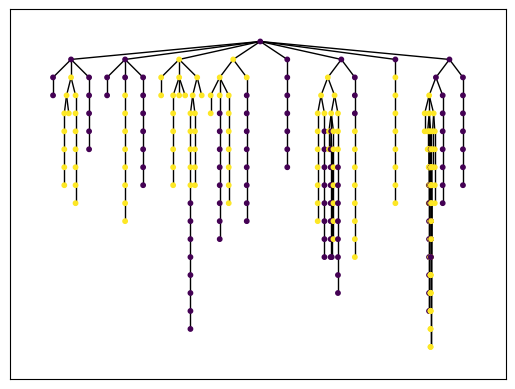

<Figure size 5000x5000 with 0 Axes>

In [32]:
nx.is_tree(nrn)
pos = hierarchy_pos(nrn,root=0)
nx.draw_networkx_edges(nrn,pos=pos); nx.draw_networkx_nodes(nrn,pos=pos,node_size=10,node_color=sevec[:,20])
plt.figure(figsize=(50,50))
labs = {i:sid[i] for i in range(len(sid))}
cyc_labs = [[labs[k] for k in c] for c in cyc]


In [ ]:

d = A.sum(0)
D = np.zeros_like(A)
D[np.diag_indices_from(D)] = d

L = D -A
Eigen = np.linalg.eigh(L)
evals = Eigen.eigenvalues
evec = Eigen.eigenvectors
sevec = np.sign(evec)
sevec_labs = np.full(sevec.shape," ")
sevec_labs[sevec == 1] = "blue"
sevec_labs[sevec == 1] = "red"


nrn = nx.from_numpy_array(A)
nx.number_connected_components(nrn)
cyc = list(nx.simple_cycles(nrn))
nx.is_tree(nrn)
pos = hierarchy_pos(nrn,root=0)
#pos = nx.spring_layout(nrn)
nx.draw_networkx_edges(nrn,pos=pos)
nx.draw_networkx_nodes(nrn,pos=pos,node_size=10,node_color=sevec[:,0])
#nx.draw_networkx_labels(G,pos,labs)
plt.show()
labs = {i:sid[i] for i in range(len(sid))}
cyc_labs = [[labs[k] for k in c] for c in cyc]
